# TP1 : suite de l'introduction

## IV. Statistiques et calcul matriciel
Le but de cet exercice est:

- De jouer avec les matrices,
- De savoir appliquer une fonction le long des colonnes / lignes d'une matrice,
- De jouer avec deux lois statistiques de base: la loi normale et exponentielle,
- De savoir dériver quelques statistiques de base d'un jeu de donnée.
- De manipuler quelques fonctions d'affichage de base

### IV.1 Création d'une jeu de donnée "climatique" idéalisé

Nous allons commencer par créer une fonction qui va générer notre jeu de donnée. Nous voulons créer une matrix `X` tel que:
- La première colonne suive une loi normale $\mathcal{N}(\mu = 0,\sigma^2=1)$ (similaire à des températures)
- La seconde colonne suive une loi exponentielle $\mathcal{E}(\lambda=2)$ (vaguement similaire à des précipitations).

À l'aide de la documentation des fonctions `base::matrix`, `stats::rnorm` (attention la loi normale attend l'écart type en paramètre) et `stats::rexp`, construire une fonction `generate_idealized_climate_data` qui prend en entrée un entier `n` (le nombre d'observations de notre jeu de donnée) et qui renvoie une matrix `X` avec les caractéristiques précédentes.


In [1]:
####################################
## Écrire votre réponse entre ici...

generate_idealized_climate_data = function( n )
{
	X = matrix( nrow = n , ncol = 2 )
	X[,1] = stats::rnorm( n , mean = 0 , sd = 1 )
	X[,2] = stats::rexp( n , rate = 2 )
	return(X)
}
	
	
## ... et la
####################################

***Question*** Générer un jeu de donnée `X` contenant 10000 observations, et utiliser la fonction `utils::head` pour afficher les premières lignes.

In [3]:
####################################
## Écrire votre réponse entre ici...

X = generate_idealized_climate_data(10000)

print(utils::head(X))

## ... et la
####################################

            [,1]      [,2]
[1,]  0.20378416 0.7364575
[2,]  0.68601653 0.5101111
[3,] -0.06199866 0.2284551
[4,]  0.13208171 0.7452184
[5,]  0.32627516 1.2528946
[6,] -1.83565306 0.5585299


***Question*** Il est commode de donner des noms aux colonnes, utilisez la fonction `base::colnames` pour intituler la colonne contenant la loi normale `"T"` (comme température), et la colonne contenant la loi exponentielle `"Pr"` (comme précipitation).

In [6]:
####################################
## Écrire votre réponse entre ici...

base::colnames(X) = base::c( "T" , "Pr" )

print(utils::head(X))

## ... et la
####################################

               T        Pr
[1,]  0.20378416 0.7364575
[2,]  0.68601653 0.5101111
[3,] -0.06199866 0.2284551
[4,]  0.13208171 0.7452184
[5,]  0.32627516 1.2528946
[6,] -1.83565306 0.5585299


### IV.2 Afficher les séries temporelles
#### IV.2.1 Selection de sous ensemble avec des matrices

***Questions*** Tester chacun des codes suivants pour en comprendre le fonctionnement (n'hésitez pas à prendre une matrice plus petite pour mieux comprendre):

- `X[3,2]`
- `X[,1]`
- `X[,2]`
- `X[-base::c(2,5),]`
- `X[12]`

Comment sont stockées les données pour une matrice ?

In [7]:
####################################
## Écrire votre réponse entre ici...

# X[3,2] : selectionne l'élément de la 3eme ligne / 2eme colonne
# X[,1] : selectionne la 1ere colonne
# X[,2] : selectionne la 2eme colonne
# X[-base::c(2,5),] : affiche X en en supprimant la 2eme et 5eme ligne
# X[12] : transforme la matrix en un vecteur 1d en "collant" les 2 colonnes et selection le 12 element


## ... et la
####################################

#### IV.2.2 Afficher les séries temporelles sur graphique

Quand on étudie un jeu de donnée, l'une des premières choses à faire est de l'afficher pour voir sa forme. Le but ici est d'afficher:

- La série qui suit une loi normale
- La série qui suit une loi exponentielle
- La structure de dépendance entre nos deux séries, i.e. la première colonne VS la deuxième colonne

La fonction qui permet d'afficher est la fonction `graphics::plot`.

***Question*** Lire la documentation de la fonction `graphics::plot` et afficher les 3 graphiques précédent. Utiliser de la couleur, et donner un nom aux axes.

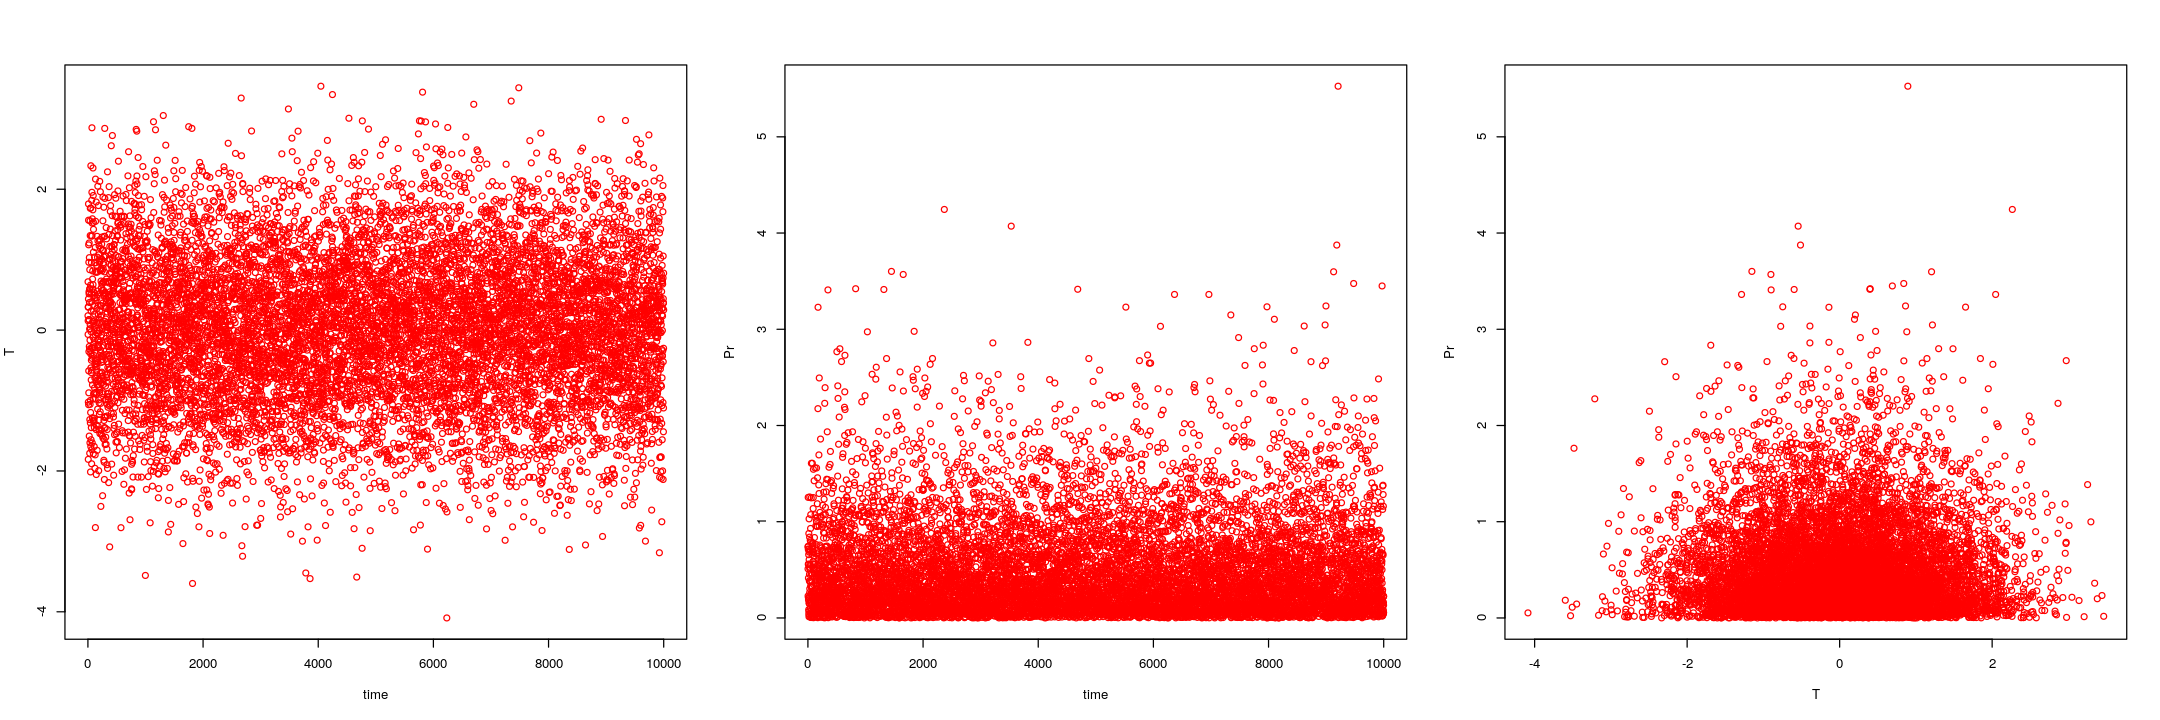

In [10]:
##################################################################################################################
## Ce bout de code est spécifique à jupyter, il permet de controler la taille en "pixel" de la sortie graphique
## Il faudra le réutiliser avant chaque graphique
nrow = 1 ## Nombre de lignes de sous-graphique
ncol = 3 ## Nombre de colonnes de sous-graphique
base::options( repr.plot.width = 6 * ncol , repr.plot.height = 6 * nrow )
graphics::par( mfrow = base::c(nrow,ncol) ) ## On construit un graphique découpé en nrow * ncol fenêtres
##
##################################################################################################################

####################################
## Écrire votre réponse entre ici...

graphics::plot( X[,1] , col = "red" , xlab = "time" , ylab = "T" )
graphics::plot( X[,2] , col = "red" , xlab = "time" , ylab = "Pr" )
graphics::plot( X[,1] , X[,2] , col = "red" , xlab = "T" , ylab = "Pr" )


## ... et la
####################################

### IV.3 Quelques statistiques
***Question*** Pour avoir une première idée des caractéristiques de notre jeu de donnée, appelez la fonction `summary` sur la matrix `X`.

In [11]:
####################################
## Écrire votre réponse entre ici...

print(summary(X))

## ... et la
####################################

       T                   Pr          
 Min.   :-4.087338   Min.   :0.000003  
 1st Qu.:-0.687301   1st Qu.:0.148199  
 Median : 0.008927   Median :0.354766  
 Mean   : 0.001081   Mean   :0.502036  
 3rd Qu.: 0.676422   3rd Qu.:0.697525  
 Max.   : 3.462988   Max.   :5.525783  


### IV.4 Retrouvons ces statistiques

Le but de cette section est de retrouver les statistiques renvoyées par la fonction `summary`.

***Question*** La moyenne est donné par la fonction `base::mean`. Utilisez cette fonction sur `X`. Quel est le problème ? Vous avez estimé la moyenne de quoi ?

In [12]:
####################################
## Écrire votre réponse entre ici...

print(base::mean(X)) ## Affiche la moyenne de tout, i.e. mélange T et Pr

## ... et la
####################################

[1] 0.2515581


Pour résoudre ce problème, nous voulons appliquer la fonction `base::mean` sur chaque colonne. Ceci peut être réalisé par la fonction `base::apply`. Elle prend les arguments suivants:

- `X` : la matrice le long de laquelle on veut appliquer la fonction `FUN`
- `MARGIN` : si on applique le long des lignes (1) ou des colonnes (2)
- `FUN` : la fonction à appliquer
- `...` : tout arguments supplémentaires à donner à `FUN`.

 ***Question*** Utilisez la fonction `base::apply` pour retrouver la moyenne de chaque colonne.

In [13]:
####################################
## Écrire votre réponse entre ici...

print( base::apply( X , 2 , base::mean ) )

## ... et la
####################################

          T          Pr 
0.001080504 0.502035762 


***Question*** avec les fonctions `base::min`, `base::max`, `stats::quantile` et `stats::sd`, retrouver les minima, maxima, 1er et 3eme quartile, la médiane et l'écart type.

***Question bonus*** Sauriez vous le faire avec une boucle sur les fonctions ?

In [16]:
####################################
## Écrire votre réponse entre ici...

for( FUN in list(base::min,base::max,stats::sd,function(x) { stats::quantile(x,probs = base::c(0.25,0.75)) }) )
	print( base::apply( X , 2 , FUN ) )

## ... et la
####################################

            T            Pr 
-4.087338e+00  2.650311e-06 
       T       Pr 
3.462988 5.525783 
        T        Pr 
1.0176757 0.4941922 
             T        Pr
25% -0.6873013 0.1481994
75%  0.6764225 0.6975252


### IV.5 Afficher un histogramme
***Objectif*** Afficher un histogramme de chaque colonne et la comparer à la densité de probabilité.

Utilisez les fonctions `graphics::hist`, `graphics::lines`, `stats::dnorm` et `stats::dexp` pour afficher cote à cote les histogrammes de chaque colonne et les densités correspondantes de chaque loi.

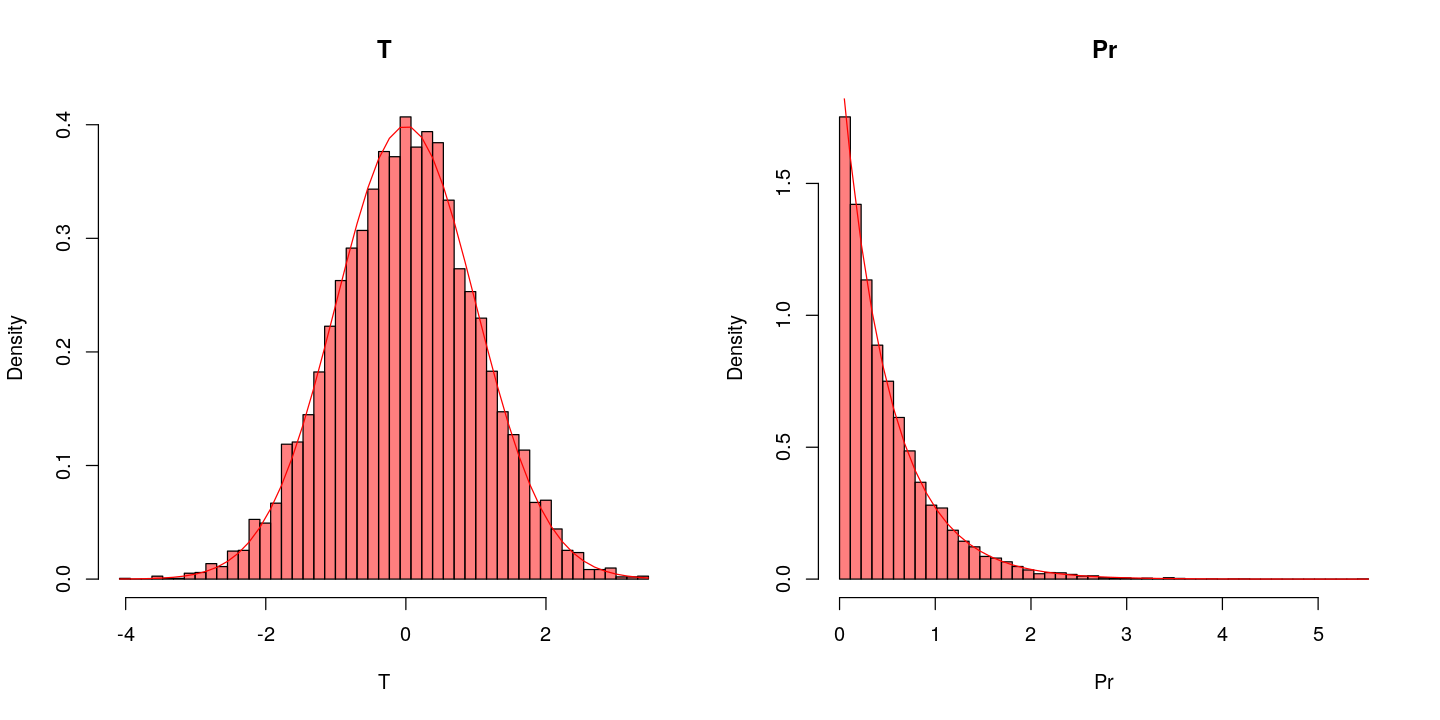

In [28]:
####################################
## Écrire votre réponse entre ici...

##################################################################################################################
## Ce bout de code est spécifique à jupyter, il permet de controler la taille en "pixel" de la sortie graphique
## Il faudra le réutiliser avant chaque graphique
nrow = 1 ## Nombre de lignes de sous-graphique
ncol = 2 ## Nombre de colonnes de sous-graphique
base::options( repr.plot.width = 6 * ncol , repr.plot.height = 6 * nrow )
graphics::par( mfrow = base::c(nrow,ncol) ) ## On construit un graphique découpé en nrow * ncol fenêtres
##
##################################################################################################################

ddist = list( dnorm , function(x) { dexp(x,rate=2) } )
for( i in 1:2 )
{
	x = base::seq( base::min(X[,i]) , base::max(X[,i]) , length = 50 )
	graphics::hist( X[,i] , breaks = x , col = grDevices::rgb(1,0,0,0.5) , freq = FALSE , main = base::colnames(X)[i] , xlab = base::colnames(X)[i] )
	graphics::lines( x , ddist[[i]](x) , col = "red" )
}


## ... et la
####################################

## V. Manipulation des dataframe
***Objectif*** Utiliser les dataframe pour étudier les températures et précipitations moyennes sur la France.

### V.1. Chargement des données

À l'aide de la fonction `read.csv`, charger le fichier EOBS_FR.csv dans une variable `data` tel que:
- Les deux colonnes contiennent la température et les précipitations,
- Les colonnes soient nommées,
- Les colonnes sont indexées par les dates,

Indices : lire la doc de la fonction `read.csv`, attention aux mot clés `header` et `row.names`.


In [35]:
####################################
## Écrire votre réponse entre ici...

data = read.csv( "EOBS_FR.csv" , row.names = 1 )

## ... et la
####################################

***Question*** Afficher un résumé des statistiques du jeu de données.

In [36]:
####################################
## Écrire votre réponse entre ici...

print(summary(data))

# ... et la
####################################

       Tm               Pr        
 Min.   :-11.42   Min.   : 0.000  
 1st Qu.:  5.59   1st Qu.: 0.200  
 Median : 10.39   Median : 1.200  
 Mean   : 10.50   Mean   : 2.215  
 3rd Qu.: 15.63   3rd Qu.: 3.400  
 Max.   : 27.18   Max.   :22.900  


### V.2. Selection de sous ensemble

Executez le code suivant, et comprennez en le fonctionnement:

~~~
subset( data , format.Date( row.names(data) , "%m" ) %in% base::c("06","07","08") )
~~~


In [39]:
####################################
## Écrire votre réponse entre ici...

data_JJA = subset( data , format.Date( row.names(data) , "%m" ) %in% base::c("06","07","08") )
## Permet de récupérer uniquement les Juin/ Juillet / Aout

## ... et la
####################################

***Questions*** Affichez un résumé des statistiques pour chaque saison.

In [42]:
####################################
## Écrire votre réponse entre ici...

data_DJF = subset( data , format.Date( row.names(data) , "%m" ) %in% base::c("12","01","02") )
data_MAM = subset( data , format.Date( row.names(data) , "%m" ) %in% base::c("03","04","05") )
data_JJA = subset( data , format.Date( row.names(data) , "%m" ) %in% base::c("06","07","08") )
data_SON = subset( data , format.Date( row.names(data) , "%m" ) %in% base::c("09","10","11") )

print(summary(data_DJF))
print(summary(data_MAM))
print(summary(data_JJA))
print(summary(data_SON))


## ... et la
####################################

       Tm                Pr        
 Min.   :-11.420   Min.   : 0.000  
 1st Qu.:  1.455   1st Qu.: 0.200  
 Median :  3.850   Median : 1.300  
 Mean   :  3.599   Mean   : 2.325  
 3rd Qu.:  6.040   3rd Qu.: 3.700  
 Max.   : 13.350   Max.   :17.100  
       Tm               Pr        
 Min.   :-6.040   Min.   : 0.000  
 1st Qu.: 6.728   1st Qu.: 0.200  
 Median : 9.560   Median : 1.300  
 Mean   : 9.485   Mean   : 2.157  
 3rd Qu.:12.240   3rd Qu.: 3.400  
 Max.   :21.300   Max.   :14.700  
       Tm              Pr        
 Min.   : 8.30   Min.   : 0.000  
 1st Qu.:15.63   1st Qu.: 0.200  
 Median :17.63   Median : 1.000  
 Mean   :17.65   Mean   : 1.958  
 3rd Qu.:19.62   3rd Qu.: 2.900  
 Max.   :27.18   Max.   :16.800  
       Tm              Pr        
 Min.   :-3.28   Min.   : 0.000  
 1st Qu.: 7.86   1st Qu.: 0.200  
 Median :11.51   Median : 1.200  
 Mean   :11.15   Mean   : 2.425  
 3rd Qu.:14.69   3rd Qu.: 3.700  
 Max.   :22.52   Max.   :22.900  


***Questions*** Sur un graphique (avec beaucoup de subplot), afficher les histogrammes des températures et précipitations pour chaque saison, ainsi que la température VS les précipitations. Commentez ces graphes

*Tips*: `for( df in list(...) )` vous permet de faire une boucle sur les éléments dans la `list`.

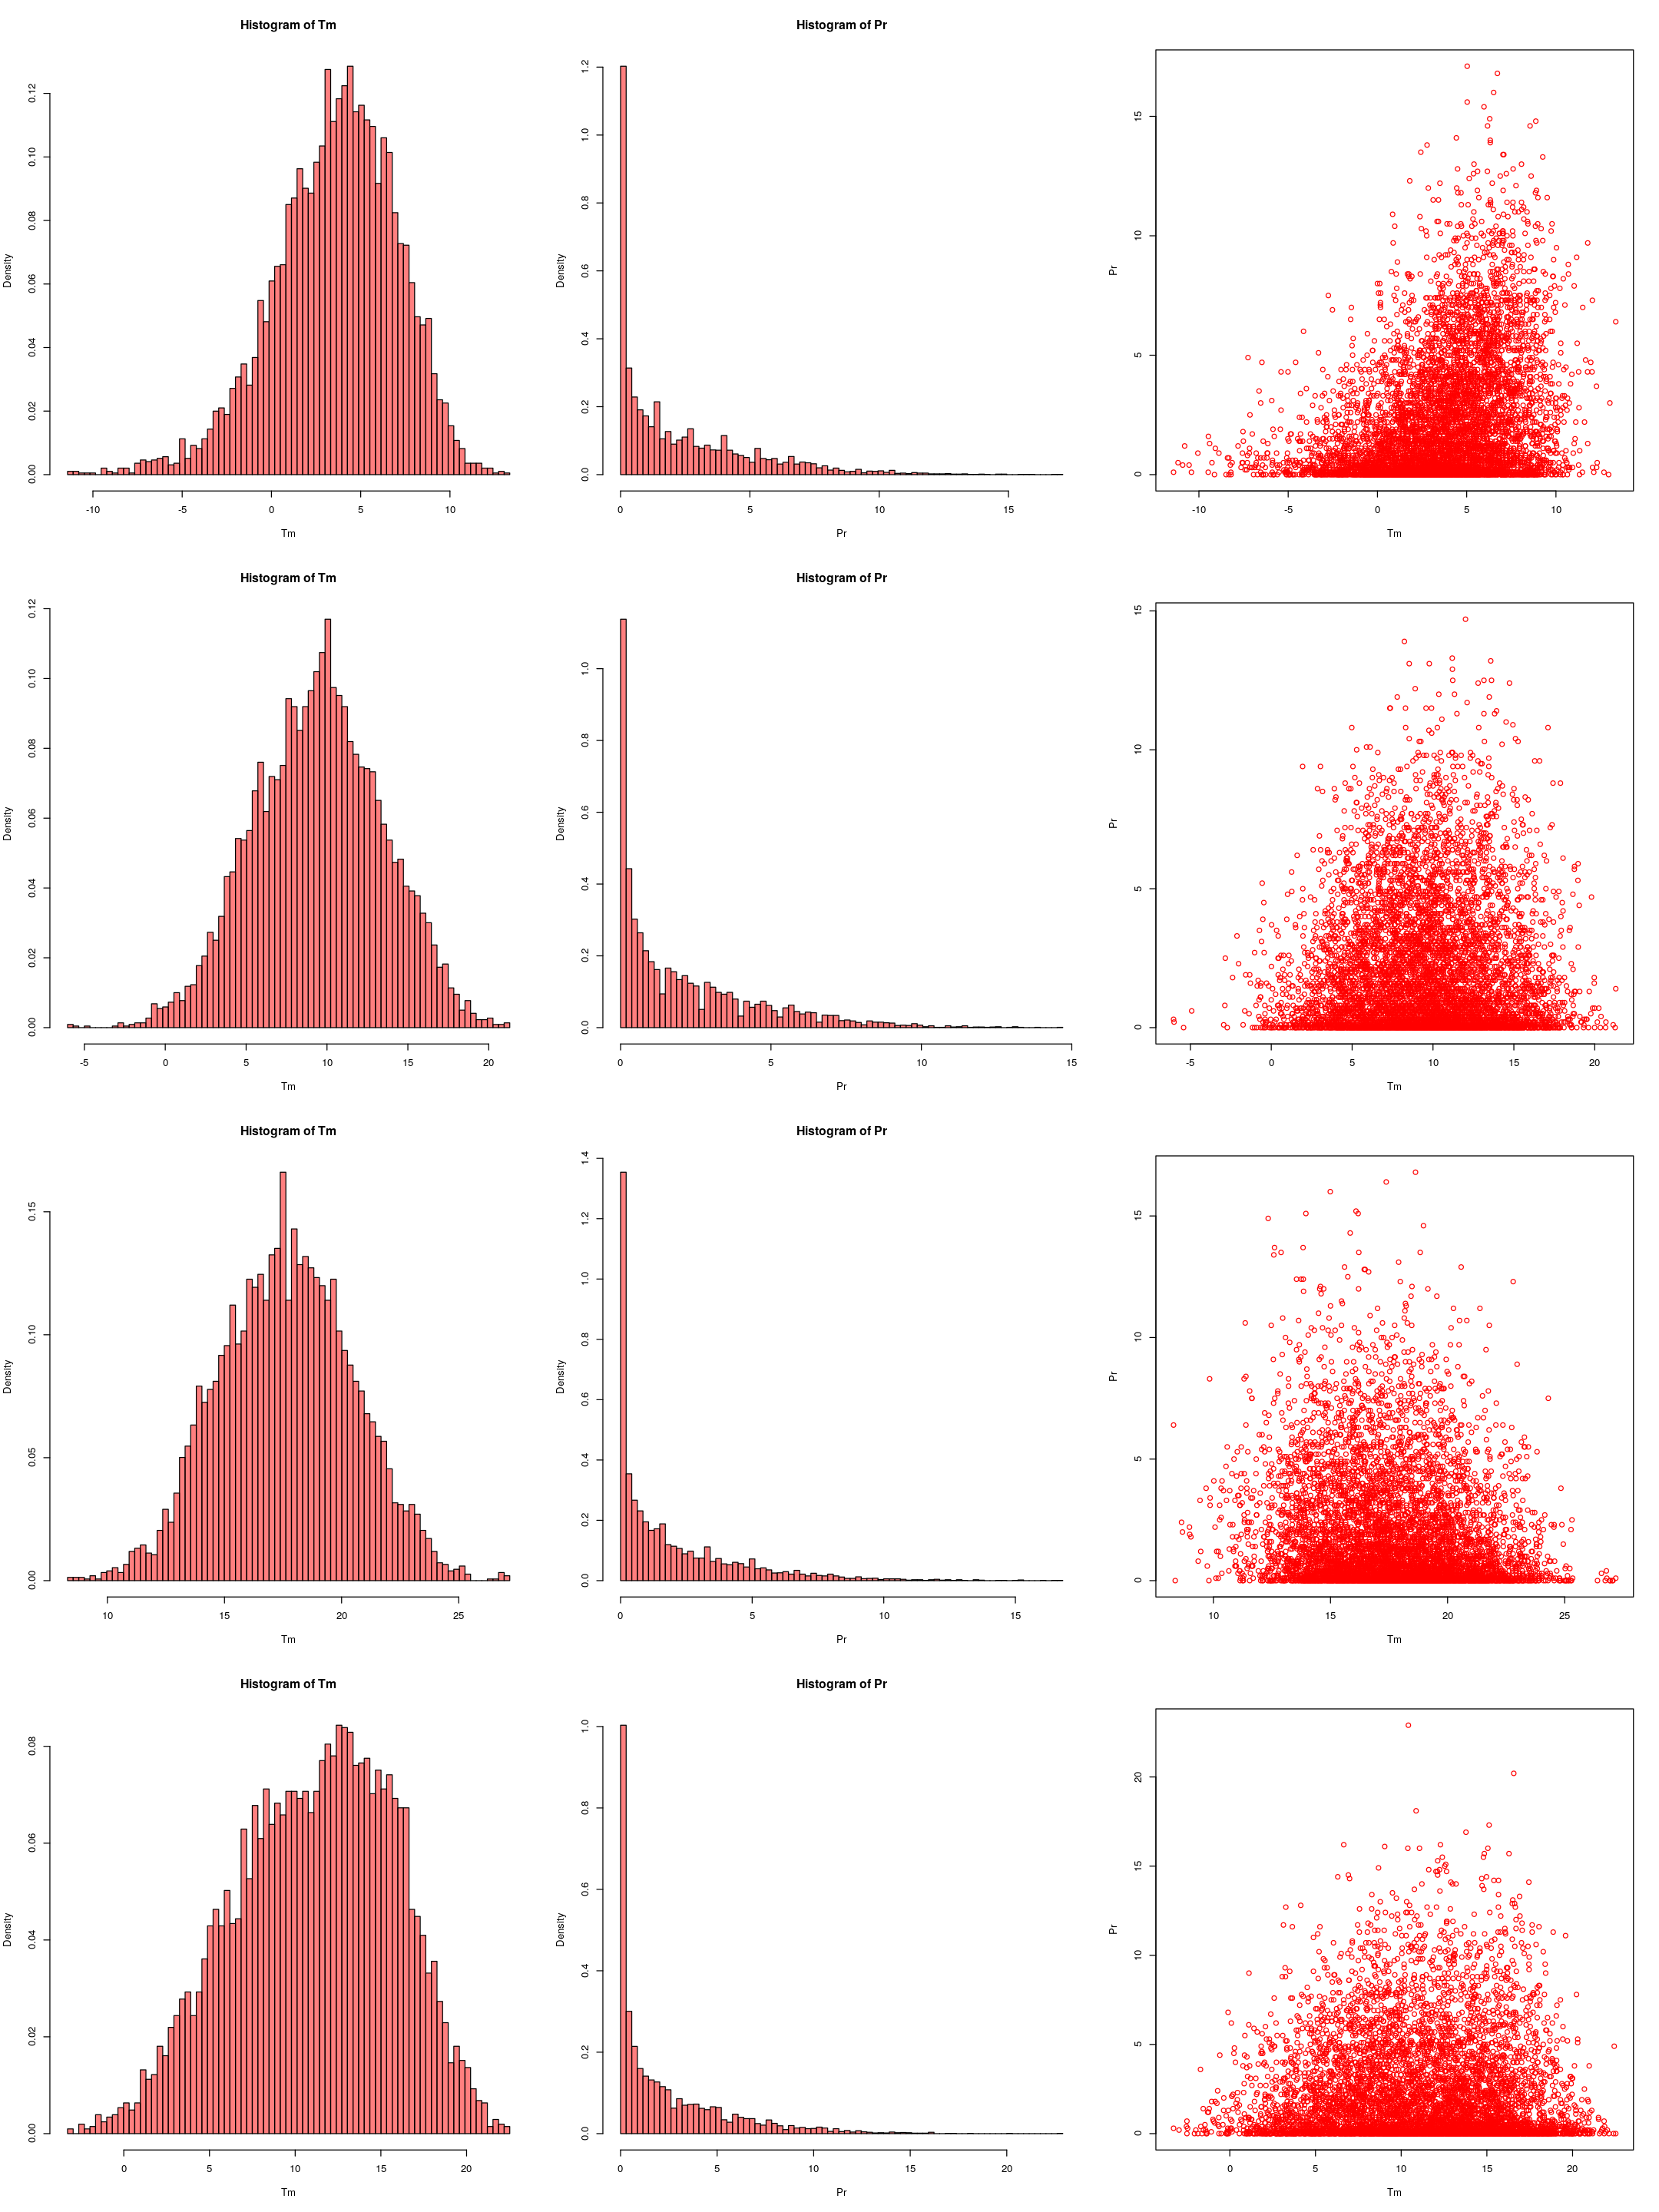

In [52]:
####################################
## Écrire votre réponse entre ici...

##################################################################################################################
## Ce bout de code est spécifique à jupyter, il permet de controler la taille en "pixel" de la sortie graphique
## Il faudra le réutiliser avant chaque graphique
nrow = 4 ## Nombre de lignes de sous-graphique
ncol = 3 ## Nombre de colonnes de sous-graphique
base::options( repr.plot.width = 6 * ncol , repr.plot.height = 6 * nrow )
graphics::par( mfrow = base::c(nrow,ncol) ) ## On construit un graphique découpé en nrow * ncol fenêtres
##
##################################################################################################################

for( df in list(data_DJF,data_MAM,data_JJA,data_SON) )
{
	x = base::seq( base::min(df[,1]) , base::max(df[,1]) , length = 80 )
	graphics::hist( df[,1] , breaks = x , col = grDevices::rgb(1,0,0,0.5) , xlab = "Tm" , freq = FALSE , main = "Histogram of Tm" )
	
	x = base::seq( base::min(df[,2]) , base::max(df[,2]) , length = 80 )
	graphics::hist( df[,2] , breaks = x , col = grDevices::rgb(1,0,0,0.5) , xlab = "Pr" , freq = FALSE , main = "Histogram of Pr" )
	
	graphics::plot( df[,1] , df[,2] , col = "red" , xlab = "Tm" , ylab = "Pr" )
}


## ... et la
####################################

### V.3 Quelques manipulations supplémentaires

En utilisant la fonction `subset`:
- Construire un dataframe ne contenant que les jours sans pluies (disons Pr < 0.1), nommée `data_sec`,
- Construire un dataframe contenant les jours très pluvieux (> 3eme quartile) avec une température d'au moins 20C, nommée `data_tropic`,
- Construire un dataframe contenant les jours sans pluies et avec des températures négatives, nommée `data_polair`,

Refaire les mêmes extractions sans la fonction `subset`.


In [63]:
####################################
## Écrire votre réponse entre ici...

## Avec la fonction subset
data_sec    = subset( data , data$Pr < 0.1 )
data_tropic = subset( data , data$Tm > 20 & data$Pr > stats::quantile(data$Pr,0.75) )
data_polair = subset( data , data$Tm < 0 & data$Pr < 0.1 )

## Sans la fonction subset
data_sec2    = data[data$Pr < 0.1,]
data_tropic2 = data[data$Tm > 20 & data$Pr > stats::quantile(data$Pr,0.75),]
data_polair  = data[data$Tm < 0 & data$Pr < 0.1,]

## ... et la
####################################